In [1]:
# Dependencies
import tweepy
import numpy as np
from datetime import datetime
import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sns

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [58]:
# Target User Account
target_users = ("BBC", "CBS", "CNN", "FoxNews", "nytimes")

# dict for holding sentiments, users, text, and time
results_dict= collections.OrderedDict([("User", []),
                                       ("Text", []),
                                       ("Date", []),
                                       ("Compound", []),
                                       ("Positive", []),
                                       ("Neutral", []),
                                       ("Negative", []),
                                       ("Tweets Ago", [])])

# loop through target users
for user in target_users:
    
    count = 0
    
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(1, 6):
        
        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)
        
        # Loop through all tweets
        for tweet in public_tweets:         
            
            count = count + 1
            
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
            # store data
            results_dict["User"].append(user)
            results_dict["Text"].append(tweet["text"])
            results_dict["Date"].append(tweet["created_at"])
            results_dict["Compound"].append(results["compound"])
            results_dict["Positive"].append(results["pos"])
            results_dict["Neutral"].append(results["neu"])
            results_dict["Negative"].append(results["neg"]) 
            results_dict["Tweets Ago"].append(count)

In [59]:
# create df
twitter_df = pd.DataFrame(results_dict)

twitter_df.head()

,User,Text,Date,Compound,Positive,Neutral,Negative,Tweets Ago
0,BBC,Would you describe yourself as a feminist?\n#H...,Sat Jun 09 20:04:00 +0000 2018,0.0000,0.000,1.000,0.000,1
1,BBC,What is it like being Germaine Greer? This obs...,Sat Jun 09 19:02:05 +0000 2018,0.3612,0.122,0.878,0.000,2
2,BBC,The cast of @QueerEye brought a bag of goodies...,Sat Jun 09 18:04:03 +0000 2018,0.0000,0.000,1.000,0.000,3
3,BBC,One hundred years after some women won the rig...,Sat Jun 09 17:01:05 +0000 2018,0.5719,0.171,0.829,0.000,4
4,BBC,"A year on from the Grenfell Tower fire, Sean a...",Sat Jun 09 16:04:03 +0000 2018,0.4019,0.222,0.623,0.156,5


In [60]:
#export df to csv
twitter_df.to_csv("twitter_data.csv")

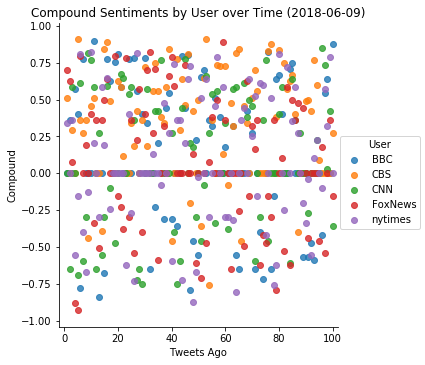

In [61]:
# plot 1 - compound sentiments vs time by user
sns.lmplot( x="Tweets Ago", y="Compound", data=twitter_df, fit_reg=False, hue="User", legend=True)
plt.title("Compound Sentiments by User over Time (2018-06-09)")
plt.xlim([-2,102])
plt.show()

In [71]:
# find overall sentiments
overall_df = pd.DataFrame(data= twitter_df.groupby('User')['Compound'].mean())
overall_df

,Compound
User,
BBC,0.114459
CBS,0.320993
CNN,0.098543
FoxNews,0.064477
nytimes,0.082367


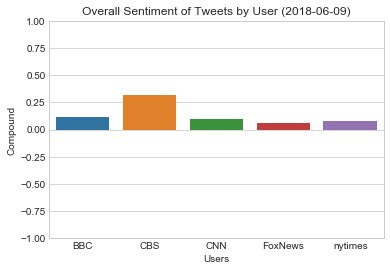

In [82]:
# plot 2 - overall tweet sentiments by user
sns.barplot(x=["BBC", "CBS", "CNN", "FoxNews", "nytimes"], y="Compound", data=overall_df)
plt.title("Overall Sentiment of Tweets by User (2018-06-09)")
plt.ylim([-1,1])
plt.xlabel("Users")
plt.show()

#### Three observations:
1. CBS has the most positive twitter overall.
2. All the users have very positive and very negative tweet sentiments.
3. The overall sentiment of the users' tweets is almost neutral, despite observation 2.

It is hard to see if there is a trend over time in the tweet sentiment based on the visualizations used.
